# Experiment 8

## Bike rental
https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [389]:
from sklearn.linear_model import LinearRegression, ARDRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from misc_utilities import regression_metrics

df = pd.read_csv("SeoulBikeData.csv")

## Analyse probleem
#### Wat is het probleem?
Regressie. We gaan proberen om de rented bike count te voorspellen
#### Dimensies dataset?

In [390]:
print(f'Rows/Columns: {df.shape}')
print(df.isnull().sum())

Rows/Columns: (8760, 14)
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


#### Soorten data/features?
Veel numerieke features, en een paar categorieke.

## Methoden
#### Welke preprocessing is nodig?
Feature encoding en scaling
#### Welke modellen ga je vergelijken?
Dit lijkt op een typisch probleem voor linear regression, dus die, en
#### Welke performance metric is passend?
We gaan MAE gebruiken omdat we niet willen discrimineren tussen grote en kleine fouten

## Process

In [391]:
#Date is not necessary for prediction, and Seasons can be inferred from the other features
df.pop('Date')
df.pop('Seasons')

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object

In [392]:
# Status is binary, and more weight should be given to developed countries, so label encoding is fine
enc = LabelEncoder()
df['Holiday'] = enc.fit_transform(df['Holiday'])
df['Functioning Day'] = enc.fit_transform(df['Functioning Day'])

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


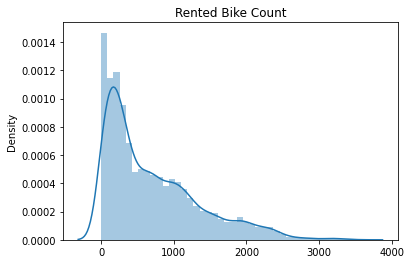

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


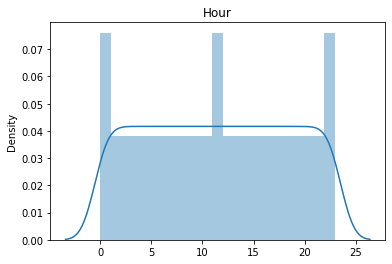

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


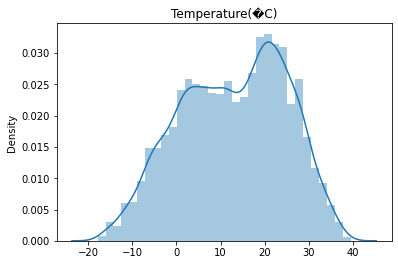

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


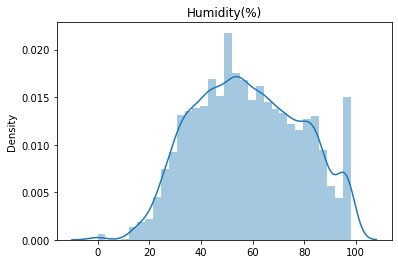

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


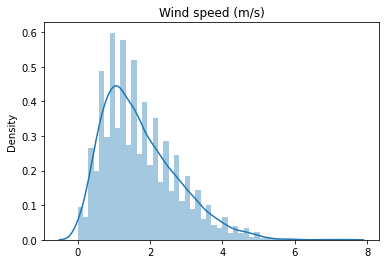

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


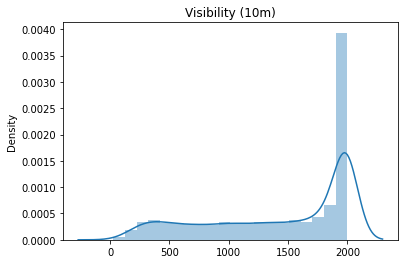

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


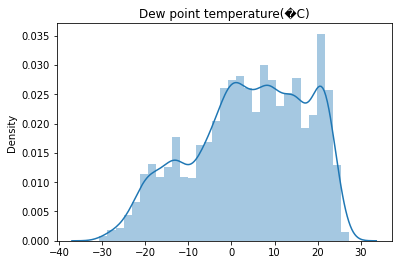

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


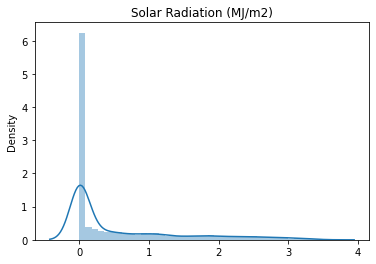

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


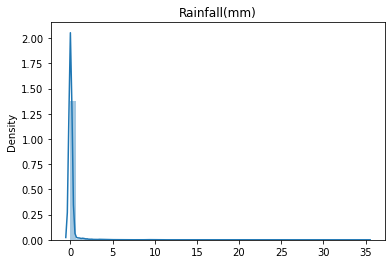

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


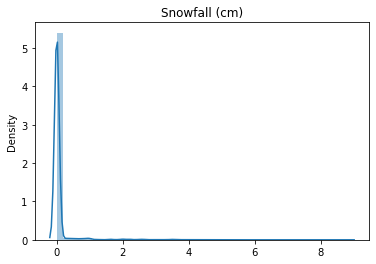

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


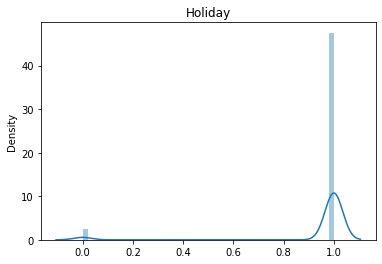

a:\software\coding projects\aai\aaivenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


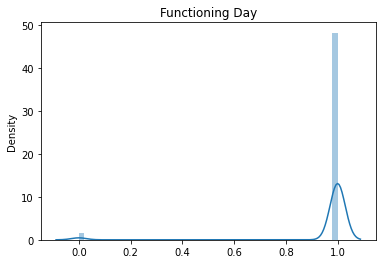

In [393]:
for column in df.columns:
    sns.distplot(x=df[column])
    plt.title(column)
    plt.show()


In [394]:
hour = df.pop('Hour')

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df['Hour'] = hour


In [395]:
zscores = zscore(df['Rented Bike Count'])
score_df = pd.DataFrame(data={'zscore': zscores, 'count': df['Rented Bike Count']})

target_zscore = score_df[score_df['zscore'] >= 3]['zscore'].sum()
target_zscore_neg = score_df[score_df['zscore'] <= -3]['zscore'].sum()
print(f"{target_zscore / score_df['zscore'].sum() * 100}% of the zscores are larger than 3")
print(f"{target_zscore_neg / score_df['zscore'].sum() * 100}% of the zscores are larger than 3")

7.441898981075867e+16% of the zscores are larger than 3
0.0% of the zscores are larger than 3


Kijkend naar de Z-scores zien we dat meer dan 7% van de scores een standaard deviatie van 3 hebben. Dit vertelt ons dat
onze target feature geen normale distributie heeft, en dat er een vrij grote kans is dat er extreme waardes in deze
feature zitten. Dit geldt uiterlijk alleen voor de positive deviaties, aangezien er geen negative hoevelheden fietsen
verkocht zijn

In [396]:
labels = df.pop('Rented Bike Count')

In [397]:
pca = PCA()
df_pca = pca.fit_transform(df)
for i in pca.explained_variance_ratio_:
    print(round(i, 3))

0.831
0.041
0.032
0.018
0.017
0.017
0.016
0.013
0.011
0.004
0.0


Met een PCA analyse kunnen we zien dat de eerste principal component verantwoordelijk is voor 83% van de variatie! Dat
is een vrij groote hoeveelheid. Door dit maken we de beslissing om het model te trainen op de eerste 6 principal
components, wat ruigweg op 95% variatie zorgt.

In [398]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df)

In [399]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, labels, train_size=0.8, shuffle=True)

In [400]:
lreg = LinearRegression()
ardreg = ARDRegression()

lreg.fit(X_train, y_train)
ardreg.fit(X_train, y_train)

ARDRegression()

## Resultaten

In [401]:
lreg_pred = lreg.predict(X_test)
print(f"LREG MAE: {regression_metrics(y_test, lreg_pred)['MAE']}")

ardreg_pred = ardreg.predict(X_test)
print(f"ARDREG MAE: {regression_metrics(y_test, ardreg_pred)['MAE']}")

LREG MAE: 0.5327323158339611
ARDREG MAE: 0.532683382992175


#### Welke classifier had het beste resultaat?
Linear regression had het beste resultaat met een MAE van 0.5327
